## Lesson 2. Work With Datetime Format in Python - Time Series Data

In [39]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
from matplotlib.axes._axes import _log as matplotlib_axes_logger

In [40]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [41]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [42]:
# Download csv of temp (F) and precip (inches) in July 2018 for Boulder, CO
file_url = 'https://ndownloader.figshare.com/files/12948515'
file_path = et.data.get_data(url=file_url, replace=True)
file_path

'C:\\Users\\Glen Shennan\\earth-analytics\\data\\earthpy-downloads\\july-2018-temperature-precip.csv'

In [43]:
boulder_july_2018 = pd.read_csv(file_path)
boulder_july_2018.head()

,date,max_temp,precip
0,2018-07-01,87,0.00
1,2018-07-02,92,0.00
2,2018-07-03,90,-999.00
3,2018-07-04,87,0.00
4,2018-07-05,84,0.24


In [44]:
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      31 non-null     object 
 1   max_temp  31 non-null     int64  
 2   precip    31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


In [45]:
boulder_july_2018.dtypes

date         object
max_temp      int64
precip      float64
dtype: object

In [46]:
type(boulder_july_2018['date'][0])

str

In [47]:
# Dealing with an error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Precipitation (inches)'),
 Text(0.5, 1.0, 'Daily Precipitation\nBoulder, Colorado, July 2018')]

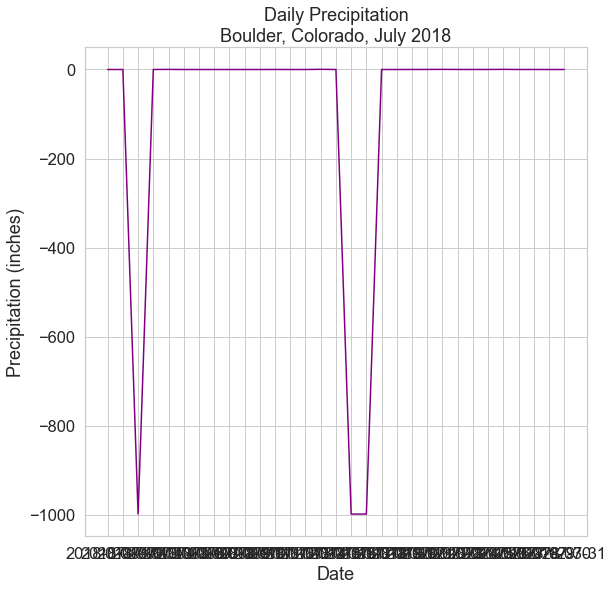

In [48]:
fig, ax = plt.subplots(figsize=(9,9))
ax.plot(boulder_july_2018['date'],
       boulder_july_2018['precip'],
       color='purple')
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily Precipitation\nBoulder, Colorado, July 2018")

In [49]:
boulder_july_2018 = pd.read_csv(file_path, parse_dates=['date'], index_col=['date'])
boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,-999.00
2018-07-04,87,0.00
2018-07-05,84,0.24


In [50]:
type(boulder_july_2018.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
boulder_july_2018.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [52]:
type(boulder_july_2018.index)

pandas.core.indexes.datetimes.DatetimeIndex

#### Plot Dates From Pandas Dataframe Using Datetime

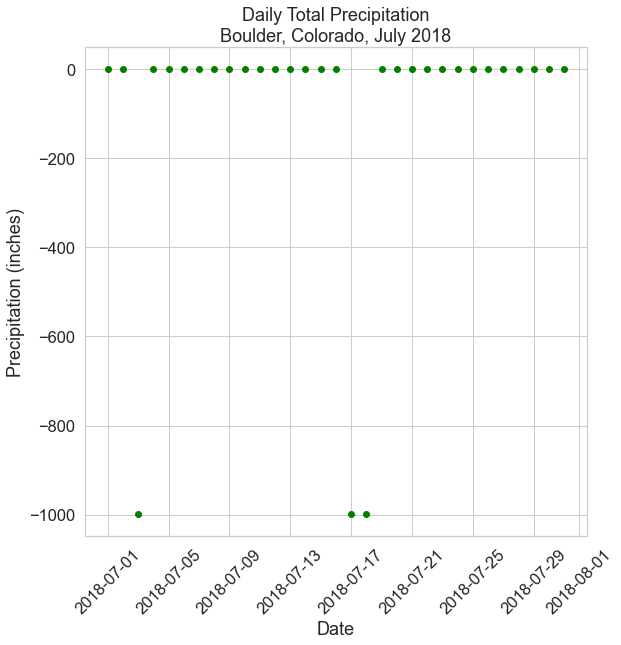

In [56]:
f, ax = plt.subplots(figsize=(9,9))
ax.scatter(boulder_july_2018.index.values,
           boulder_july_2018['precip'],
           color='green')
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado, July 2018")
xlabels = ax.get_xticklabels()
plt.setp(xlabels, rotation=45)
plt.show()

In [54]:
boulder_july_2018.describe()

,max_temp,precip
count,31.000000,31.000000
mean,88.129032,-96.618065
std,6.626925,300.256388
min,75.000000,-999.000000
25%,84.000000,0.000000
50%,88.000000,0.000000
75%,94.000000,0.050000
max,97.000000,0.450000


In [57]:
# Import data using no data value
boulder_july_2018 = pd.read_csv(file_path,
                                parse_dates=['date'],
                                index_col=['date'],
                                na_values=[-999])

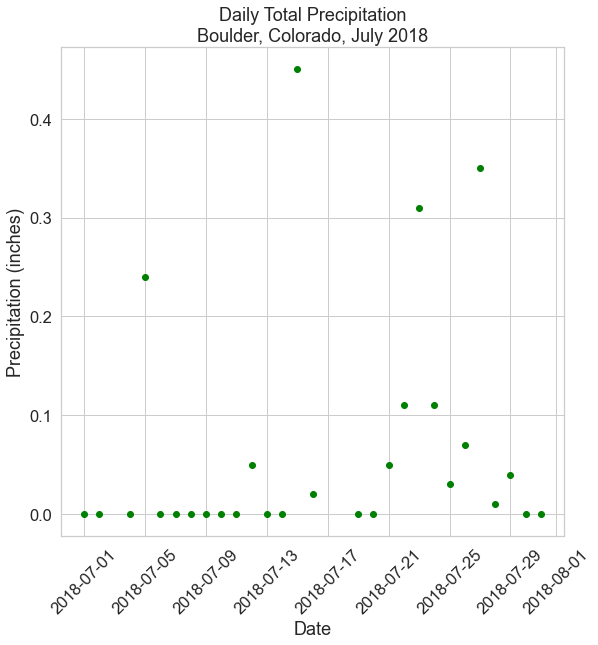

In [63]:
f, ax = plt.subplots(figsize=(9,9))
ax.scatter(boulder_july_2018.index.values,
           boulder_july_2018['precip'],
           color='green')
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado, July 2018")
xlabels = ax.get_xticklabels()
plt.setp(xlabels, rotation=45)
plt.show()